# 📊 Data Analysis and Visualization Assignment (Iris Dataset)


### Objectives
* Load and analyze a dataset using the **pandas** library.
* Perform data cleaning and exploration.
* Compute basic statistics and group analysis.
* Create visualizations with **matplotlib** and **seaborn**.


## Task 1: Load and Explore the Dataset

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris

# Load dataset
try:
    iris = load_iris(as_frame=True)
    df = iris.frame
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Dataset not found.")
except Exception as e:
    print("Unexpected error:", e)

# Display first few rows
display(df.head())

# Info
print("\nDataset Info:")
print(df.info())

# Missing values
print("\nMissing values:")
print(df.isnull().sum())

# Clean dataset (if any missing)
df = df.dropna()

# Add species column for readability
df['species'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})


Dataset loaded successfully!


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


## Task 2: Basic Data Analysis

In [9]:

# Descriptive statistics
print("Basic Statistics:")
display(df.describe())

# Group by species and compute means
grouped = df.groupby('species').mean()
print("\nMean of Numerical Columns by Species:")
display(grouped)

# Observations
print("\nObservations:")
print("- Setosa has the smallest petal length/width on average.")
print("- Virginica generally has the largest petal measurements.")
print("- Sepal length and petal length tend to increase together.")


Basic Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Mean of Numerical Columns by Species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0



Observations:
- Setosa has the smallest petal length/width on average.
- Virginica generally has the largest petal measurements.
- Sepal length and petal length tend to increase together.


## Task 3: Data Visualization

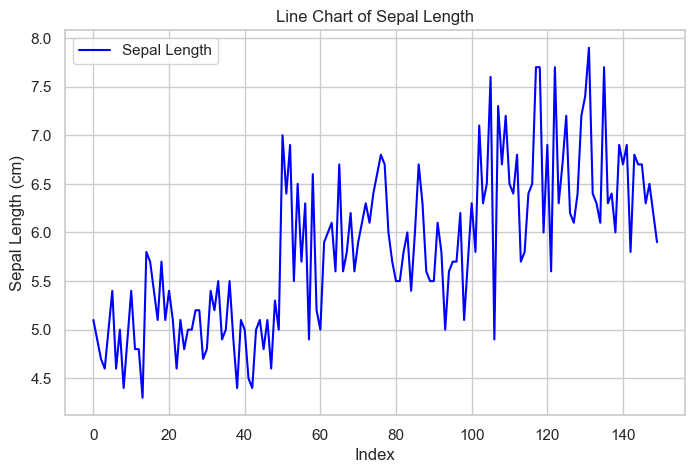

C:\Users\barai\AppData\Local\Temp\ipykernel_10708\4264163211.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df, estimator=np.mean, palette="viridis")


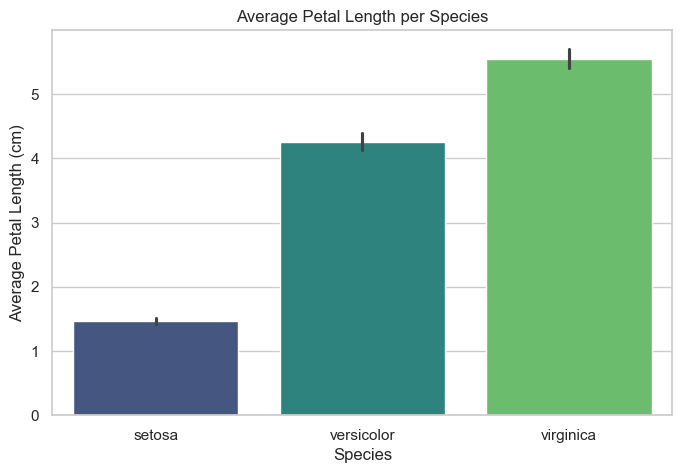

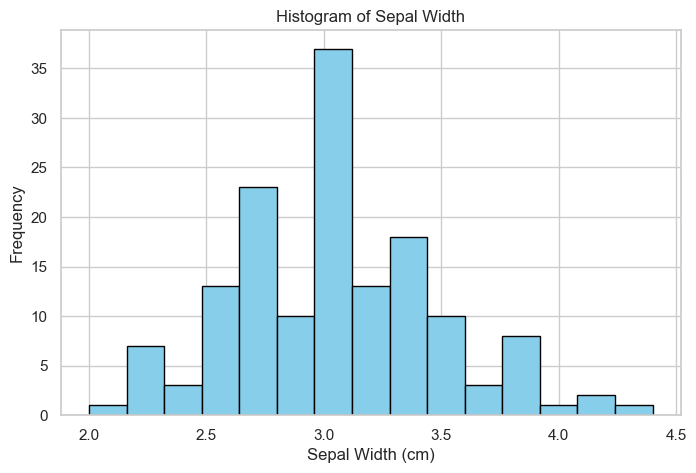

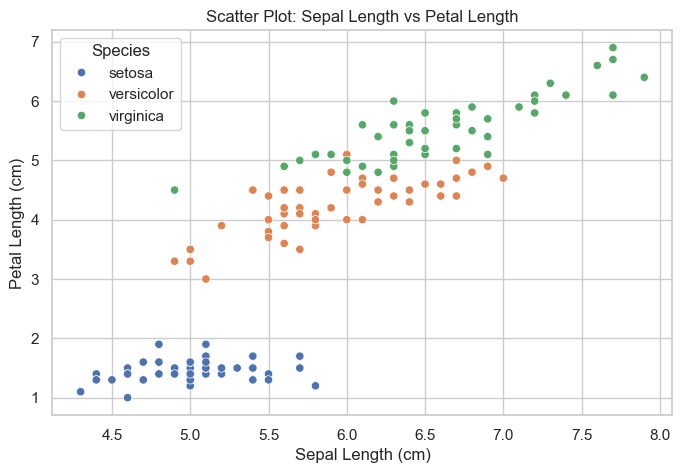

In [12]:

sns.set(style="whitegrid")

# 1. Line Chart: sepal length trend over index
plt.figure(figsize=(8,5))
plt.plot(df.index, df['sepal length (cm)'], label="Sepal Length", color="blue")
plt.title("Line Chart of Sepal Length")
plt.xlabel("Index")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.show()

# 2. Bar Chart: Average petal length per species
plt.figure(figsize=(8,5))
sns.barplot(x='species', y='petal length (cm)', data=df, estimator=np.mean, palette="viridis")
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()

# 3. Histogram: Distribution of sepal width
plt.figure(figsize=(8,5))
plt.hist(df['sepal width (cm)'], bins=15, color="skyblue", edgecolor="black")
plt.title("Histogram of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot: Sepal length vs Petal length
plt.figure(figsize=(8,5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df, palette="deep")
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()



## 🔎 Findings and Observations

1. **Species differences:**
   - *Setosa* has the **smallest petal length and width** on average.
   - *Virginica* has the **largest petal measurements** (both length and width).
   - *Versicolor* falls in between.

2. **Sepal vs Petal relationship:**
   - Sepal length and petal length show a **positive correlation** — when one increases, the other tends to increase as well.

3. **Distributions:**
   - The histogram of sepal width shows most flowers fall between **2.5 cm and 3.5 cm**.

4. **Group averages:**
   - Grouped statistics confirm clear separation of species based on petal measurements.  
   - This distinct separation is why the Iris dataset is widely used for testing classification algorithms.
